# Showing daily COVID-19 cases in NSW
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maxim75/data-visualization/blob/master/notebooks/COVID_data_1.ipynb)

In [80]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [81]:
start_date = "2021-06-20"

# Data source 
# https://data.nsw.gov.au/nsw-covid-19-data/cases
confirmed_cases_url = "https://data.nsw.gov.au/data/dataset/aefcde60-3b0c-4bc0-9af1-6fe652944ec2/resource/21304414-1ff1-4243-a5d2-f52778048b29/download/confirmed_cases_table1_location.csv"

# load data from CSV file
cases_df = pd.read_csv(confirmed_cases_url)

# filter by start_date
cases_df = cases_df[cases_df["notification_date"] >= start_date]

In [82]:
# group by notification_date and get number of records for each date
cases_per_day = cases_df.groupby(by=["notification_date"]).size().to_frame("count").reset_index()

# get 7 day average value
cases_per_day["count_7days_mean"] = cases_per_day.iloc[:,1].rolling(window=7).mean()

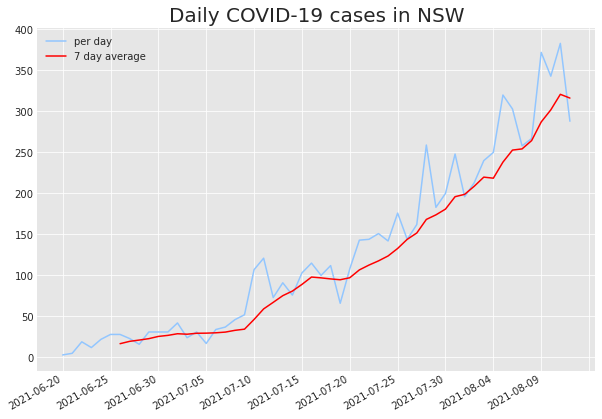

In [83]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot("notification_date", "count", data=cases_per_day, label="per day")
ax.plot("notification_date", "count_7days_mean", data=cases_per_day, color="red", label="7 day average")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

# set x-axis date values output and positioning 
fmt_half_year = mdates.DayLocator(interval=5)
ax.xaxis.set_major_locator(fmt_half_year)
fig.autofmt_xdate()

text = ax.set_title("Daily COVID-19 cases in NSW", fontsize=20)